Q4. ***Random Forest***: For this question also, you have to use the same football dataset. The aim is to use the Random Forest model to do classification and regression both.

(a) ***Classification***: Your target column is ‘contribution type’. Process the data as you want, modify/drop any columns that you want, and play around with the hyperparameters. Try to understand and observe the difference in results. Try different losses (or quality criterion)– ‘gini’, ‘entropy’, ‘log loss’. After training the model, report test accuracy and f1 score.

(b) ***Regression:*** Your target column is ‘overall’. Again, you are free to process the dataset and encouraged to try different hyperparameters. Use MSE and MAE one by one to train the models, and report test MSE and MAE for both models.

Note: You can use sklearn library to get Random Forest implementations.

In [2]:
import csv
def load_data(filename):
    dataset = []
    csvfile = open(filename, newline = '')
    reader = csv.reader(csvfile)
    for i in reader:
        dataset.append(i)
    return dataset

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.evaluate import bias_variance_decomp

path_link = "/content/drive/MyDrive/ML_assignment/football.csv"
dataframe = pd.read_csv(path_link)
dataframe.head()

,sofifa_id,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
0,158023,L. Messi,93,93,78000000.0,320000.0,34,170,72,73.0,...,20,35,24,6,11,15,14,8,NaN,1
1,188545,R. Lewandowski,92,92,119500000.0,270000.0,32,185,81,21.0,...,35,42,19,15,6,12,8,10,NaN,1
2,20801,Cristiano Ronaldo,91,91,45000000.0,270000.0,36,187,83,11.0,...,24,32,24,7,11,15,14,11,NaN,1
3,190871,Neymar Jr,91,91,129000000.0,270000.0,29,175,68,73.0,...,35,32,29,9,9,15,15,11,NaN,1
4,192985,K. De Bruyne,91,91,125500000.0,350000.0,30,181,70,10.0,...,68,65,53,15,13,5,10,13,NaN,1


In [5]:
dataframe = dataframe.drop(['club_team_id','club_name','league_name','club_jersey_number','nation_jersey_number','preferred_foot','work_rate','body_type','player_tags','player_traits','sofifa_id','short_name'],axis=1)

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7772 entries, 0 to 7771
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   overall                      7772 non-null   int64  
 1   potential                    7772 non-null   int64  
 2   value_eur                    7706 non-null   float64
 3   wage_eur                     7711 non-null   float64
 4   age                          7772 non-null   int64  
 5   height_cm                    7772 non-null   int64  
 6   weight_kg                    7772 non-null   int64  
 7   league_level                 7711 non-null   float64
 8   weak_foot                    7772 non-null   int64  
 9   skill_moves                  7772 non-null   int64  
 10  international_reputation     7772 non-null   int64  
 11  release_clause_eur           7306 non-null   float64
 12  pace                         7063 non-null   float64
 13  shooting          

In [6]:
median_value = dataframe['value_eur'].median()
dataframe['value_eur'].fillna(value=median_value,inplace=True)

median_value = dataframe['wage_eur'].median()
dataframe['wage_eur'].fillna(value=median_value,inplace=True)

median_value = dataframe['league_level'].median()
dataframe['league_level'].fillna(value=median_value,inplace=True)

median_value = dataframe['release_clause_eur'].median()
dataframe['release_clause_eur'].fillna(value=median_value,inplace=True)

median_value = dataframe['pace'].median()
dataframe['pace'].fillna(value=median_value,inplace=True)

median_value = dataframe['shooting'].median()
dataframe['shooting'].fillna(value=median_value,inplace=True)

median_value = dataframe['passing'].median()
dataframe['passing'].fillna(value=median_value,inplace=True)

median_value = dataframe['dribbling'].median()
dataframe['dribbling'].fillna(value=median_value,inplace=True)

median_value = dataframe['defending'].median()
dataframe['defending'].fillna(value=median_value,inplace=True)

median_value = dataframe['physic'].median()
dataframe['physic'].fillna(value=median_value,inplace=True)

median_value = dataframe['goalkeeping_speed'].median()
dataframe['goalkeeping_speed'].fillna(value=median_value,inplace=True)


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7772 entries, 0 to 7771
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   overall                      7772 non-null   int64  
 1   potential                    7772 non-null   int64  
 2   value_eur                    7772 non-null   float64
 3   wage_eur                     7772 non-null   float64
 4   age                          7772 non-null   int64  
 5   height_cm                    7772 non-null   int64  
 6   weight_kg                    7772 non-null   int64  
 7   league_level                 7772 non-null   float64
 8   weak_foot                    7772 non-null   int64  
 9   skill_moves                  7772 non-null   int64  
 10  international_reputation     7772 non-null   int64  
 11  release_clause_eur           7772 non-null   float64
 12  pace                         7772 non-null   float64
 13  shooting          

***a) Classification***

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, mean_absolute_error

In [ ]:
X = dataframe.drop('contribution_type', axis=1)
Y = dataframe['contribution_type']

# Computing the target variable
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# Split the classification data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initializing and training the Random Forest classifiers for classification
crit = ['gini', 'entropy', 'log_loss']
no_of_decision_trees = [25,50,100,200,400,800,1600,3200]

#Classification with gini criterion:
list1=[]
for n in no_of_decision_trees:
     c = RandomForestClassifier(n_estimators=n, criterion=crit[0], random_state=101,oob_score=True)
     c.fit(X_train, Y_train)
     list1.append(c.oob_score_)

esti = no_of_decision_trees[list1.index(max(list1))]
c = RandomForestClassifier(n_estimators=esti, criterion=crit[0], random_state=101)
c.fit(X_train, Y_train)
Y_pred = c.predict(X_test)

acc= accuracy_score(Y_test, Y_pred)
f = f1_score(Y_test, Y_pred, average='weighted')

print(f"Classification with {crit[0]} criterion:")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f:.4f}")
print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Classification with gini criterion:
Accuracy: 0.8965
F1 Score: 0.8962




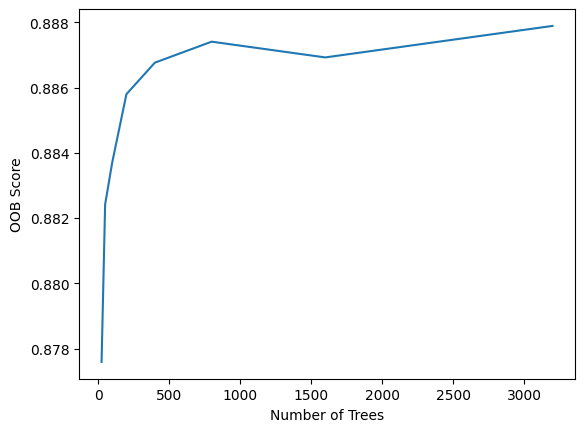

In [ ]:
plt.plot(no_of_decision_trees, list1)
plt.xlabel("Number of Trees")
plt.ylabel("OOB Score")
plt.show()

In [ ]:
X = dataframe.drop('contribution_type', axis=1)
Y = dataframe['contribution_type']

# Computing the target variable
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# Split the classification data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initializing and training the Random Forest classifiers for classification
crit = ['gini', 'entropy', 'log_loss']
no_of_decision_trees = [25,50,100,200,400,800,1600,3200]

#Classification with entropy criterion:
list1=[]
for n in no_of_decision_trees:
     c = RandomForestClassifier(n_estimators=n, criterion=crit[1], random_state=101,oob_score=True)
     c.fit(X_train, Y_train)
     list1.append(c.oob_score_)

esti = no_of_decision_trees[list1.index(max(list1))]
c = RandomForestClassifier(n_estimators=esti, criterion=crit[1], random_state=101)
c.fit(X_train, Y_train)
Y_pred = c.predict(X_test)

acc= accuracy_score(Y_test, Y_pred)
f = f1_score(Y_test, Y_pred, average='weighted')

print(f"Classification with {crit[1]} criterion:")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f:.4f}")
print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Classification with entropy criterion:
Accuracy: 0.8984
F1 Score: 0.8981




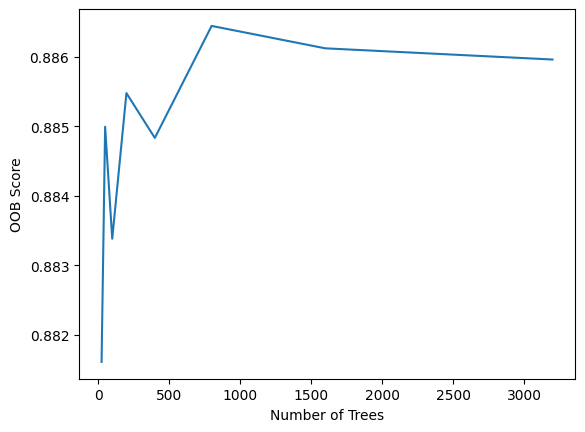

In [ ]:
plt.plot(no_of_decision_trees, list1)
plt.xlabel("Number of Trees")
plt.ylabel("OOB Score")
plt.show()

In [ ]:
X = dataframe.drop('contribution_type', axis=1)
Y = dataframe['contribution_type']

# Computing the target variable
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# Split the classification data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initializing and training the Random Forest classifiers for classification
crit = ['gini', 'entropy', 'log_loss']
no_of_decision_trees = [25,50,100,200,400,800,1600,3200]

#Classification with log_loss criterion:
list1=[]
for n in no_of_decision_trees:
     c = RandomForestClassifier(n_estimators=n, criterion=crit[2], random_state=101,oob_score=True)
     c.fit(X_train, Y_train)
     list1.append(c.oob_score_)

esti = no_of_decision_trees[list1.index(max(list1))]
c = RandomForestClassifier(n_estimators=esti, criterion=crit[2], random_state=101)
c.fit(X_train, Y_train)
Y_pred = c.predict(X_test)

acc= accuracy_score(Y_test, Y_pred)
f = f1_score(Y_test, Y_pred, average='weighted')

print(f"Classification with {crit[2]} criterion:")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f:.4f}")
print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Classification with log_loss criterion:
Accuracy: 0.8984
F1 Score: 0.8981




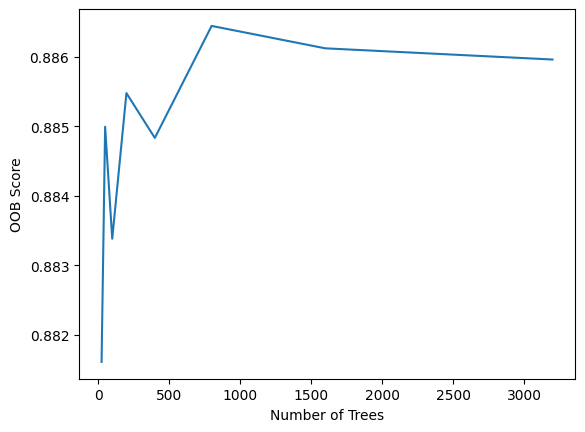

In [ ]:
plt.plot(no_of_decision_trees, list1)
plt.xlabel("Number of Trees")
plt.ylabel("OOB Score")
plt.show()

 ***b) Regression***

In [10]:
X1 = dataframe.drop('overall', axis=1)
Y1 = dataframe['overall']

# Split the regression data
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=101)

# Initializing and training the Random Forest regressors
crit = ['squared_error', 'absolute_error']
no_of_decision_trees = [25,50,50,70,80,110,120]
#Regression with MSE criterion:
list1=[]
for o in no_of_decision_trees :
        r = RandomForestRegressor(n_estimators=o, criterion=crit[0], random_state=42,oob_score=True)
        r.fit(X1_train, Y1_train)
        list1.append(r.oob_score_)
best_estim = no_of_decision_trees[list1.index(max(list1))]
reg = RandomForestRegressor(n_estimators=best_estim, criterion=crit[0], random_state=42,oob_score=True)
reg.fit(X1_train, Y1_train)
Y1_pred = r.predict(X1_test)
mse = mean_squared_error(Y1_test, Y1_pred)
print(f"Regression with MSE criterion:")
print(f"Mean Squared Error (MSE): {mse:.4f}")



Regression with MSE criterion:
Mean Squared Error (MSE): 0.2950


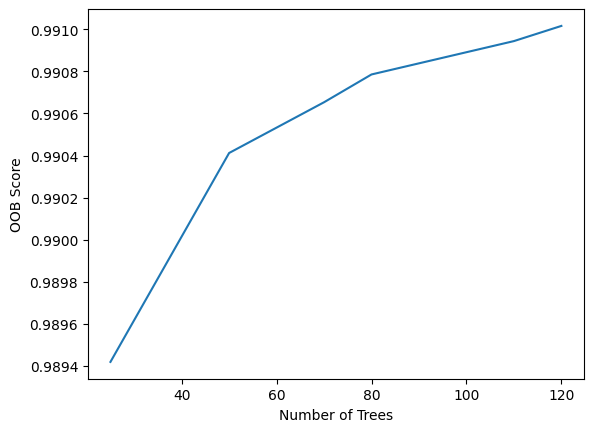

In [11]:
plt.plot(no_of_decision_trees, list1)
plt.xlabel("Number of Trees")
plt.ylabel("OOB Score")
plt.show()

In [ ]:
X1 = dataframe.drop('overall', axis=1)
Y1 = dataframe['overall']

# Split the regression data
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=100)

# Initializing and training the Random Forest regressors
crit = ['squared_error', 'absolute_error']
no_of_decision_trees = [25,50,50,70,80,110,120]
#Regression with MAE criterion:
list1=[]
for o in no_of_decision_trees :
        r = RandomForestRegressor(n_estimators=o, criterion=crit[1], random_state=42,oob_score=True)
        r.fit(X1_train, Y1_train)
        list1.append(r.oob_score_)
best_estim = no_of_decision_trees[list1.index(max(list1))]
reg = RandomForestRegressor(n_estimators=best_estim, criterion=crit[0], random_state=42,oob_score=True)
reg.fit(X1_train, Y1_train)
Y1_pred = r.predict(X1_test)
mse = mean_squared_error(Y1_test, Y1_pred)
print(f"Regression with MAE criterion:")
print(f"Mean Absolute Error (MAE): {mse:.4f}")



Regression with MAE criterion:
Mean Absolute Error (MAE): 0.3195


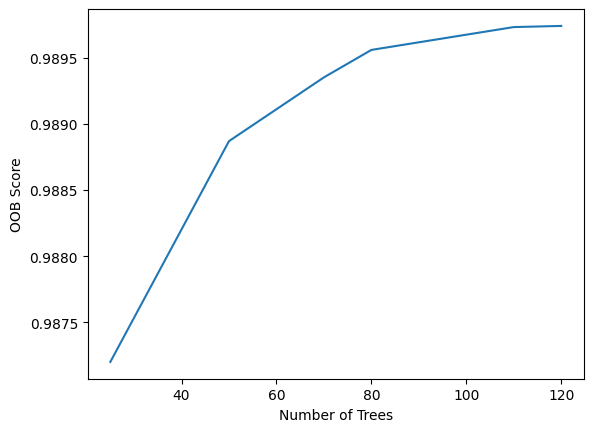

In [ ]:
plt.plot(no_of_decision_trees, list1)
plt.xlabel("Number of Trees")
plt.ylabel("OOB Score")
plt.show()